<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy import genfromtxt
data= pd.read_csv('MultipleLR.csv - MultipleLR.csv.csv', header=None)
#csv1 = open("MultipleLR.csv")
#data = np.loadtxt(csv1, delimiter=",")
data.insert(0,'X0',1)
d=data.to_numpy()
d


array([[  1,  73,  80,  75, 152],
       [  1,  93,  88,  93, 185],
       [  1,  89,  91,  90, 180],
       [  1,  96,  98, 100, 196],
       [  1,  73,  66,  70, 142],
       [  1,  53,  46,  55, 101],
       [  1,  69,  74,  77, 149],
       [  1,  47,  56,  60, 115],
       [  1,  87,  79,  90, 175],
       [  1,  79,  70,  88, 164],
       [  1,  69,  70,  73, 141],
       [  1,  70,  65,  74, 141],
       [  1,  93,  95,  91, 184],
       [  1,  79,  80,  73, 152],
       [  1,  70,  73,  78, 148],
       [  1,  93,  89,  96, 192],
       [  1,  78,  75,  68, 147],
       [  1,  81,  90,  93, 183],
       [  1,  88,  92,  86, 177],
       [  1,  78,  83,  77, 159],
       [  1,  82,  86,  90, 177],
       [  1,  86,  82,  89, 175],
       [  1,  78,  83,  85, 175],
       [  1,  76,  83,  71, 149],
       [  1,  96,  93,  95, 192]], dtype=int64)

In [4]:
x = d[:, :4]
x
x.shape

(25, 4)

In [5]:
y1=d[:,4].reshape(25,1)
y1
print(np.shape(y1))


(25, 1)


In [6]:
theta=np.zeros((4,1)) #vector of zeros
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

In [7]:
h=np.dot(x, theta)
h

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [8]:
err=h-y1
err.shape
err

array([[-152.],
       [-185.],
       [-180.],
       [-196.],
       [-142.],
       [-101.],
       [-149.],
       [-115.],
       [-175.],
       [-164.],
       [-141.],
       [-141.],
       [-184.],
       [-152.],
       [-148.],
       [-192.],
       [-147.],
       [-183.],
       [-177.],
       [-159.],
       [-177.],
       [-175.],
       [-175.],
       [-149.],
       [-192.]])

In [9]:
m=len(x)
cost=(err.T@err)/2*m
cost

array([[8378737.5]])

In [10]:
dtheta=(x.T@err)/m
dtheta

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

In [11]:
alpha=.001
theta=theta-alpha*dtheta
theta

array([[ 0.16204],
       [13.0758 ],
       [13.1472 ],
       [13.46708]])

Multivariable adam batch

In [197]:
import math
alpha=0.00001 
e=1e-8
i=1000
B1=0.9 #beta
B2=0.99
theta_0=[]
theta_1=[]
theta_2=[]
theta_3=[]
H2=[]
def adam (x,y1,alpha,e,i,B1,B2):
    theta0,theta1,theta2,theta3=0,0,0,0
    theta_0.append(theta0) #theta0 t
    theta_1.append(theta1)
    theta_2.append(theta2)
    theta_3.append(theta3)
    t=1
    m=len(x)
    theta=np.zeros((4,1)) #vector of zeros
    Vt1=np.zeros((4,1)) #vector of zeros
    mt1=np.zeros((4,1)) #vector of zeros


    h=np.dot(x, theta)     #h=theta0+theta1*x                        
    H2.append(h)
    err=h-y1
    cost=(err.T@err)/2*m
    Cost1=[]
    Cost=[]
    Cost1=np.append(Cost1,cost)
    Cost=np.append(Cost,cost[0,0]) 
    dtheta=(x.T@err)/m
    theta=theta-alpha*dtheta


    for n in range(i):
        h=np.dot(x, theta)
        H2.append(h)
        err=h-y1
        cost=(err.T@err)/2*m
        Cost1=np.append(Cost1,cost)# size=(100, 1, 1) 100 Xcost(size(1,1))
        Cost=np.append(Cost,cost[0,0]) #size=(100,) here we take 1st dim of cost 
        dtheta=(x.T@err)/m
        theta=theta-alpha*dtheta
        
        mt0=[]
        Vt0=[]
        mt_c=[]
        Vt_c=[]
        mt0=B1*mt1+(1-B1)*dtheta
        Vt0=B2*Vt1+(1-B2)*(dtheta**2)
        mt_c=mt0/(1-B1**t)
        Vt_c=1/(1-B2**t)
        theta=theta-(alpha*mt_c/(Vt_c**2+e))
        theta_0.append(theta[0])
        theta_1.append(theta[1])
        theta_2.append(theta[2])
        theta_3.append(theta[3])

        t+=1
    
    return H2,Cost,Cost1

    

HH,c,c1=adam (x,y1,alpha,e,i,B1,B2)



In [179]:
from sklearn.metrics import r2_score
r2_score(y1, H2[-1])



0.982294970526699

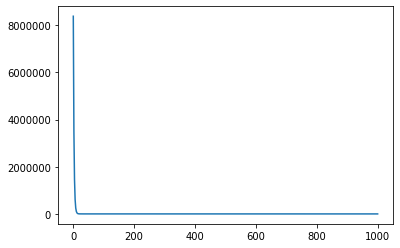

In [180]:
iters=np.linspace(0, 1000, num=1001)
plt.plot(iters,c)
plt.show()

(1001,)
(1001,)


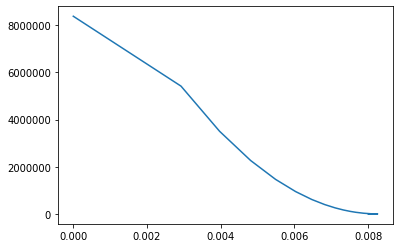

In [191]:
print(np.shape(theta_0))
print(np.shape(c))

plt.plot(theta_0,c)
plt.show()

(1001,)
(1001,)


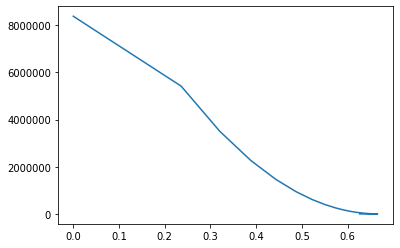

In [192]:
print(np.shape(theta_1))
print(np.shape(c))

plt.plot(theta_1,c)
plt.show()

(1001,)
(1001,)


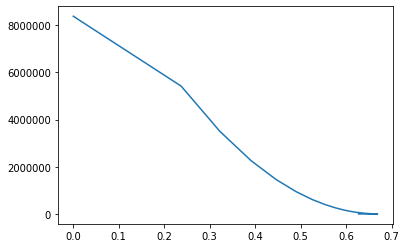

In [198]:
print(np.shape(theta_2))
print(np.shape(c))

plt.plot(theta_2,c)
plt.show()

(1001,)
(1001,)


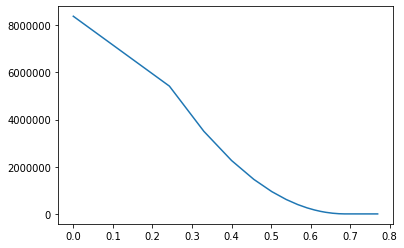

In [199]:
print(np.shape(theta_3))
print(np.shape(c))

plt.plot(theta_3,c)
plt.show()

In [175]:
import math
alpha=0.00001 
e=1e-8
i=1000
B1=0.9 #beta
B2=0.99
theta_0=[]
theta_1=[]
theta_2=[]
theta_3=[]
H2=[]
def adam (x,y1,alpha,e,i,B1,B2):
    t=1
    m=len(x)
    theta=np.zeros((4,1)) #vector of zeros
    Vt1=np.zeros((4,1)) #vector of zeros
    mt1=np.zeros((4,1)) #vector of zeros


    h=np.dot(x, theta)     #h=theta0+theta1*x                        
    H2.append(h)
    err=h-y1
    cost=(err.T@err)/2*m
    Cost1=[]
    Cost=[]
    Cost1=np.append(Cost1,cost)
    Cost=np.append(Cost,cost[0,0]) 
    dtheta=(x.T@err)/m
    theta=theta-alpha*dtheta


    for n in range(i):
        h=np.dot(x, theta)
        H2.append(h)
        err=h-y1
        cost=(err.T@err)/2*m
        Cost1=np.append(Cost1,cost)# size=(100, 1, 1) 100 Xcost(size(1,1))
        Cost=np.append(Cost,cost[0,0]) #size=(100,) here we take 1st dim of cost 
        dtheta=(x.T@err)/m
        theta=theta-alpha*dtheta
        
        mt0=[]
        Vt0=[]
        mt_c=[]
        Vt_c=[]
        mt0=B1*mt1+(1-B1)*dtheta
        Vt0=B2*Vt1+(1-B2)*(dtheta**2)
        mt_c=mt0/(1-B1**t)
        Vt_c=1/(1-B2**t)
        theta=theta-(alpha*mt_c/(Vt_c**2+e))


        t+=1
    
    return H2,Cost,Cost1

    

HH,c,c1=adam (x,y1,alpha,e,i,B1,B2)



In [176]:
from sklearn.metrics import r2_score
r2_score(y1, H2[-1])

0.982294970526699

In [171]:
#mini batch
import math
alpha=0.00001 
e=1e-8
i=1000
b=4
B1=0.9 #beta
B2=0.99
theta_0=[]
theta_1=[]
theta_2=[]
theta_3=[]
H2=[]
def adam (x,y1,alpha,e,i,B1,B2):
    theta0,theta1,theta2,theta3=0,0,0,0
    Vt01,Vt11,Vt21,Vt31=0,0,0,0       #Vt0 -1 Vt01
    mt01,mt11,mt21,mt31=0,0,0,0
    t=1
    m=len(x)
    theta_0.append(theta0) #theta0 t
    theta_1.append(theta1)
    theta_2.append(theta2)
    theta_3.append(theta3)
    theta=np.zeros((4,1)) #vector of zeros
    Vt=np.zeros((4,1)) #vector of zeros
    mt=np.zeros((4,1)) #vector of zeros


    h=np.dot(x, theta)     #h=theta0+theta1*x                        
    H2.append(h)
    err=h-y1
    cost=(err.T@err)/2*m
    Cost1=[]
    Cost=[]
    Cost1=np.append(Cost1,cost)
    Cost=np.append(Cost,cost[0,0]) 
    dtheta=(x.T@err)/m
    theta=theta-alpha*dtheta

    for n in range(i):
        for k in range(b):
            h=np.dot(x, theta)
            H2.append(h)
            err=h-y1
            cost=(err.T@err)/2*m
            Cost1=np.append(Cost1,cost)# size=(100, 1, 1) 100 Xcost(size(1,1))
            Cost=np.append(Cost,cost[0,0]) #size=(100,) here we take 1st dim of cost 
            dtheta=(x.T@err)/m
            theta=theta-alpha*dtheta

            mt0=B1*mt01+(1-B1)*dtheta[0]
            Vt0=B2*Vt01+(1-B2)*(dtheta[0]**2)
            mt0_c=mt0/(1-B1**t)
            Vt0_c=1/(1-B2**t)
            theta0=theta0-(alpha*mt0_c/(math.sqrt(Vt0_c)+e))

            mt1=B1*mt11+(1-B1)*dtheta[1]
            Vt1=B2*Vt11+(1-B2)*(dtheta[1]**2)
            mt1_c=mt1/(1-B1**t)
            Vt1_c=1/(1-B2**t)
            theta1=theta1-(alpha*mt1_c/(math.sqrt(Vt1_c)+e))

            mt2=B2*mt21+(1-B1)*dtheta[2]
            Vt2=B2*Vt21+(1-B2)*(dtheta[2]**2)
            mt2_c=mt2/(1-B1**t)
            Vt2_c=1/(1-B2**t)
            theta2=theta2-(alpha*mt2_c/(math.sqrt(Vt2_c)+e))

            mt3=B2*mt31+(1-B1)*dtheta[3]
            Vt3=B2*Vt31+(1-B2)*(dtheta[3]**2)
            mt3_c=mt3/(1-B1**t)
            Vt3_c=1/(1-B2**t)
            theta3=theta3-(alpha*mt3_c/(math.sqrt(Vt3_c)+e))

            t+=1

            theta_0.append(theta0)
            theta_1.append(theta1)
            theta_2.append(theta2)
            theta_3.append(theta3)

    return H2,Cost,Cost1

HH,c,c1=adam (x,y1,alpha,e,i,B1,B2)



(25, 1)


In [172]:
from sklearn.metrics import r2_score
r2_score(y1, HH[-1])

0.986709469550543

In [189]:
#mini batch
import math
alpha=0.00001 
e=1e-8
i=1000
B1=0.9 #beta
B2=0.99
theta_0=[]
theta_1=[]
theta_2=[]
theta_3=[]
H2=[]
def adam (x,y1,alpha,e,i,B1,B2):
    t=1
    m=len(x)
    theta=np.zeros((4,1)) #vector of zeros
    Vt1=np.zeros((4,1)) #vector of zeros
    mt1=np.zeros((4,1)) #vector of zeros


    h=np.dot(x, theta)     #h=theta0+theta1*x                        
    H2.append(h)
    err=h-y1
    cost=(err.T@err)/2*m
    Cost1=[]
    Cost=[]
    Cost1=np.append(Cost1,cost)
    Cost=np.append(Cost,cost[0,0]) 
    dtheta=(x.T@err)/m
    theta=theta-alpha*dtheta


    for n in range(i):
        for k in range(b):
            h=np.dot(x, theta)
            H2.append(h)
            err=h-y1
            cost=(err.T@err)/2*m
            Cost1=np.append(Cost1,cost)# size=(100, 1, 1) 100 Xcost(size(1,1))
            Cost=np.append(Cost,cost[0,0]) #size=(100,) here we take 1st dim of cost 
            dtheta=(x.T@err)/m
            theta=theta-alpha*dtheta

            mt0=[]
            Vt0=[]
            mt_c=[]
            Vt_c=[]
            mt0=B1*mt1+(1-B1)*dtheta
            Vt0=B2*Vt1+(1-B2)*(dtheta**2)
            mt_c=mt0/(1-B1**t)
            Vt_c=1/(1-B2**t)
            theta=theta-(alpha*mt_c/(Vt_c**2+e))
            theta_0.append(theta[0])
            theta_1.append(theta[1])

            t+=1
    
    return H2,Cost,Cost1

    

HH,c,c1=adam (x,y1,alpha,e,i,B1,B2)



In [188]:
from sklearn.metrics import r2_score
r2_score(y1, HH[-1])

0.9870011742146412

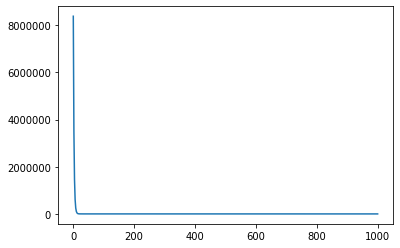

In [200]:
iters=np.linspace(0, 1000, num=1001)
plt.plot(iters,c)
plt.show()

(1001,)
(1001,)


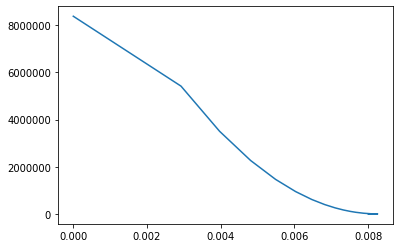

In [201]:
print(np.shape(theta_0))
print(np.shape(c))

plt.plot(theta_0,c)
plt.show()

(1001,)
(1001,)


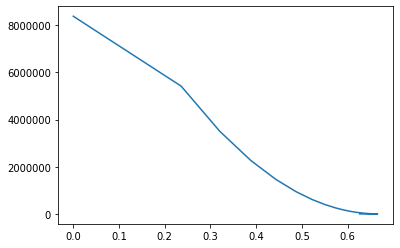

In [202]:
print(np.shape(theta_1))
print(np.shape(c))

plt.plot(theta_1,c)
plt.show()

(1001,)
(1001,)


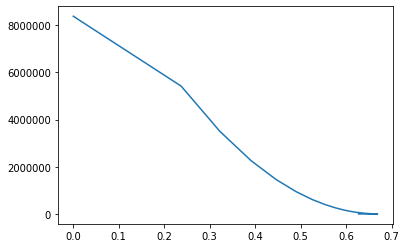

In [203]:
print(np.shape(theta_2))
print(np.shape(c))

plt.plot(theta_2,c)
plt.show()

(1001,)
(1001,)


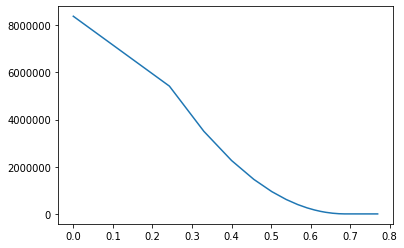

In [204]:
print(np.shape(theta_3))
print(np.shape(c))

plt.plot(theta_3,c)
plt.show()